<a href="https://colab.research.google.com/github/QuanShi-226/Bias-Identification-Demo/blob/main/A1_QuanShi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 导入必要的库
import pandas as pd
from scipy.io import arff

# 指定ARFF文件的路径
data_class_path = '/content/drive/MyDrive/18668/A1-files/data-class.arff'
feature_envy_path = '/content/drive/MyDrive/18668/A1-files/feature-envy.arff'
god_class_path = '/content/drive/MyDrive/18668/A1-files/god-class.arff'
long_method_path = '/content/drive/MyDrive/18668/A1-files/long-method.arff'

# 读取ARFF文件的函数
def load_arff_file(file_path):
    data, meta = arff.loadarff(file_path)
    df = pd.DataFrame(data)
    return df

# 加载各个文件
data_class_df = load_arff_file(data_class_path)
feature_envy_df = load_arff_file(feature_envy_path)
god_class_df = load_arff_file(god_class_path)
long_method_df = load_arff_file(long_method_path)

# 查看数据集
print(data_class_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   NOII_type  NOAM_type  NOCS_type  NOM_type  NMO_type  ATFD_type  \
0        0.0        0.0        0.0       6.0       0.0        3.0   
1        0.0        0.0        0.0       2.0       2.0        0.0   
2        0.0        0.0        0.0       7.0       0.0        2.0   
3        0.0        0.0        0.0       1.0       0.0        0.0   
4        0.0        0.0        0.0       4.0       0.0        0.0   

   FANOUT_type  NOMNAMM_type  NOA_type  NIM_type  ...  \
0          1.0           6.0       2.0      32.0  ...   
1          0.0           2.0       4.0      30.0  ...   
2          1.0           7.0       3.0      32.0  ...   
3          0.0           1.0       2.0      32.0  ...   
4          2.0           4.0       1.0      32.0  ...   

   number_not_abstract_not_final_methods  number_static_methods  \
0                                    6.0      

Missing values:
 NOII_type                                            0
NOAM_type                                            0
NOCS_type                                            0
NOM_type                                             0
NMO_type                                            39
                                                    ..
number_not_final_not_static_methods                  0
number_standard_design_methods                       0
number_constructor_DefaultConstructor_methods        0
number_constructor_NotDefaultConstructor_methods     0
is_data_class                                        0
Length: 62, dtype: int64

Missing percentage for 'NMO_type': 4.64%

True/False counts for 'is_data_class':
 is_data_class
b'false'    700
b'true'     140
Name: count, dtype: int64


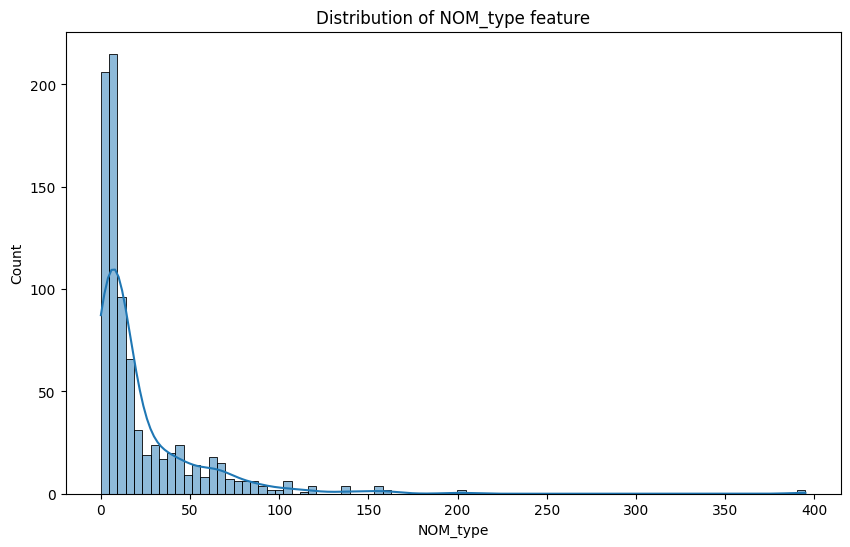

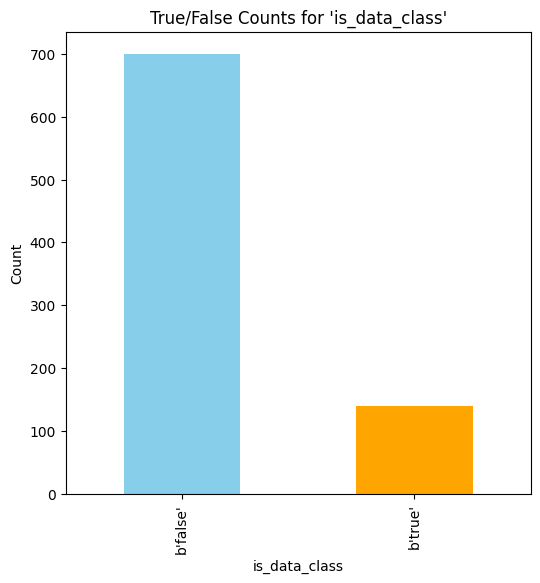

In [ ]:
# 导入必要的库
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. 检查缺失值
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing values:\n", missing_values)
    return missing_values

# 2. 计算'NMO_type'列中缺失值的比例
def calculate_missing_percentage(df, column):
    missing_percentage = (df[column].isnull().sum() / len(df)) * 100
    print(f"\nMissing percentage for '{column}': {missing_percentage:.2f}%")
    return missing_percentage

# 3. 计算True/False的分布
def count_true_false(df, column):
    true_false_counts = df[column].value_counts()
    print(f"\nTrue/False counts for '{column}':\n", true_false_counts)
    return true_false_counts

# 4. 特征的分布可视化
def visualize_feature_distribution(df, feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature} feature")
    plt.show()

# 5. 类别分布可视化
def visualize_true_false_distribution(true_false_counts):
    plt.figure(figsize=(6, 6))
    true_false_counts.plot(kind='bar', color=['skyblue', 'orange'])
    plt.title("True/False Counts for 'is_data_class'")
    plt.ylabel("Count")
    plt.show()

# 执行流程

# 1. 检查缺失值
missing_values = check_missing_values(data_class_df)

# 2. 计算'NMO_type'列中缺失值的比例
nmo_missing_percentage = calculate_missing_percentage(data_class_df, 'NMO_type')

# 3. 计算True/False的分布
true_false_counts = count_true_false(data_class_df, 'is_data_class')

# 4. 特征的分布可视化
visualize_feature_distribution(data_class_df, 'NOM_type')

# 5. 类别分布可视化
visualize_true_false_distribution(true_false_counts)


数据分析笔记
1. 缺失值分析
在数据集中，NMO_type特征存在39个缺失值，占数据集总量的4.64%。目前来看，这部分缺失值对数据集的整体影响相对较小。
2. 类别不平衡分析
is_data_class列的True/False分布非常不平衡：
false: 700
true: 140
此类别不平衡问题可能会导致模型偏向于预测false类别。
调整类别权重：在训练模型时为true类别赋予更大的权重。
3. 特征分布偏态分析
通过对NOM_type特征的分析，发现该特征具有较强的偏态分布，大多数样本的NOM值较低，少数样本的NOM值非常高。这种特征分布不均匀可能会导致模型在处理此特征时表现不佳。 解决方案可以包括：

对数变换（Log Transformation）：减小特征中的极端值对模型的影响。
标准化或归一化：使特征值分布更均匀。

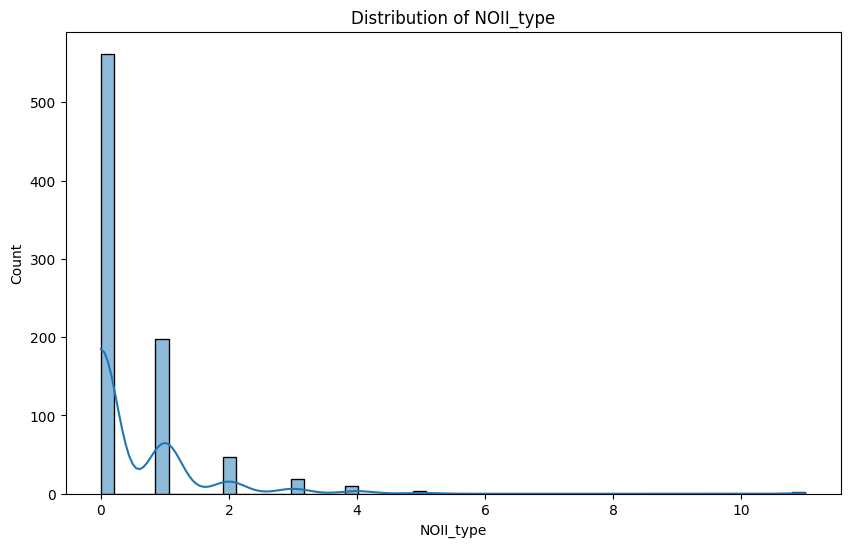

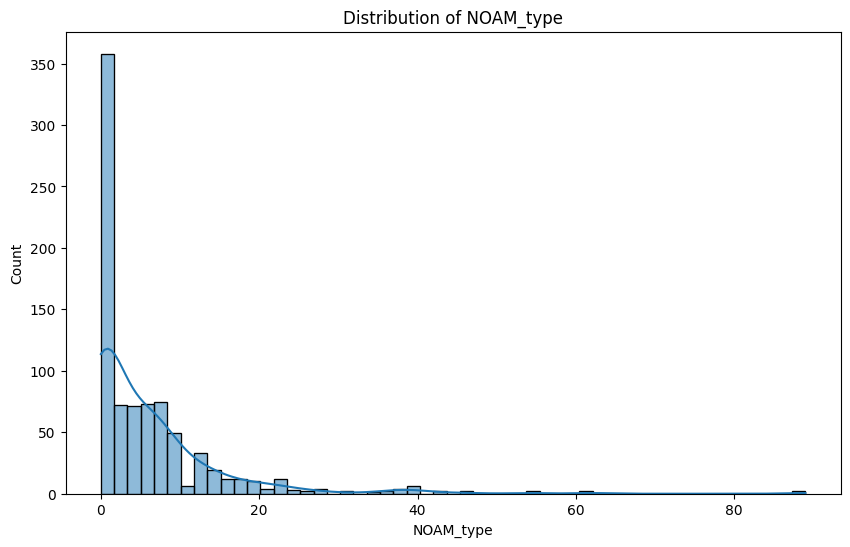

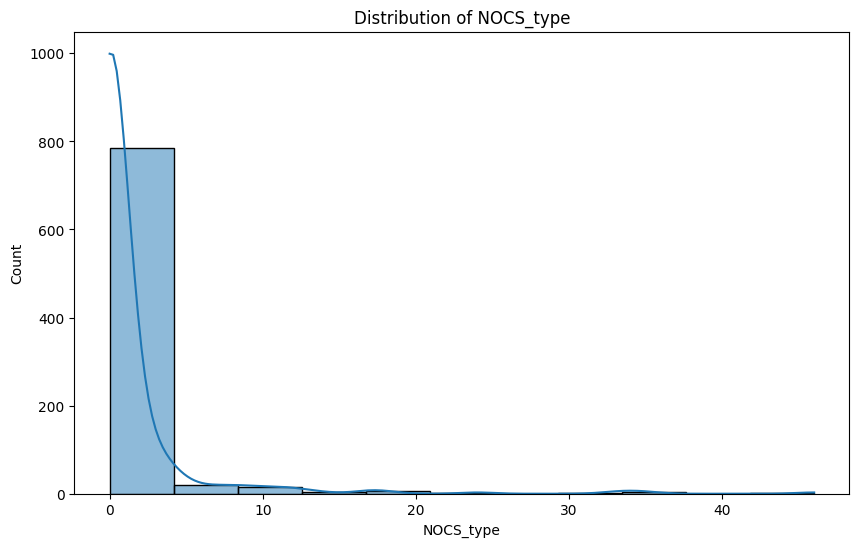

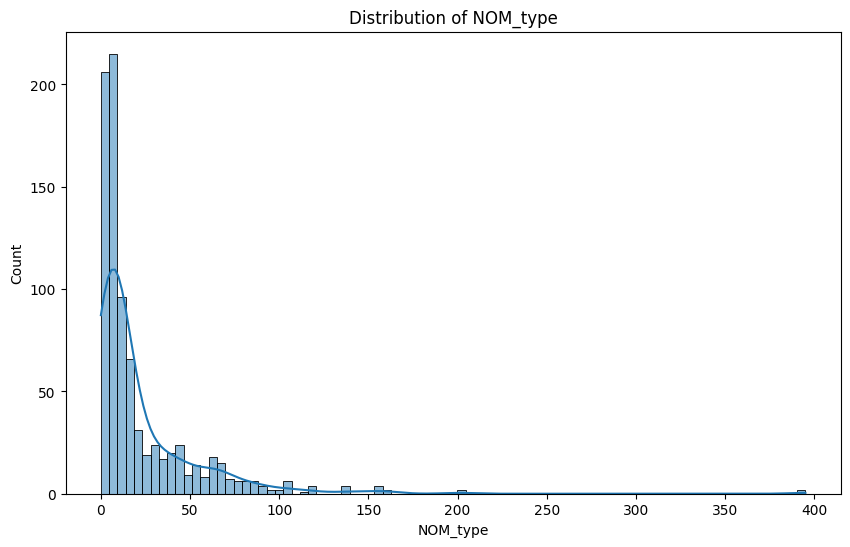

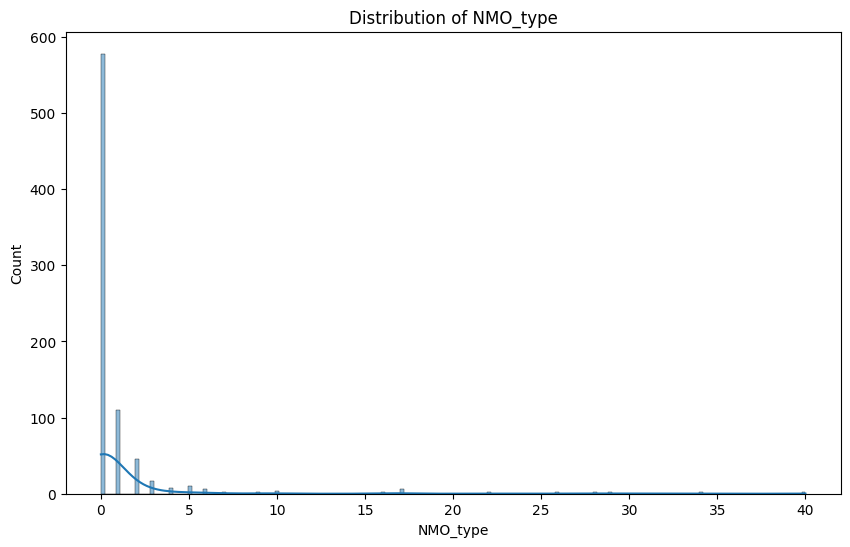

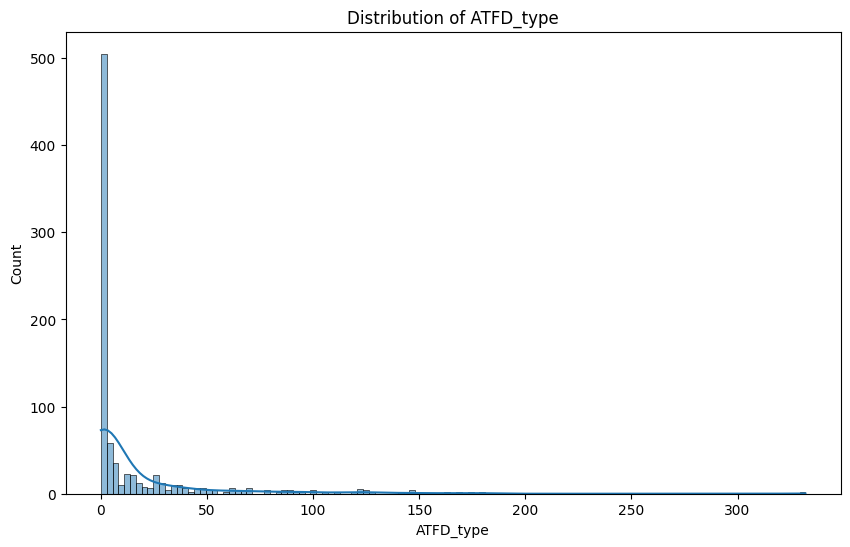

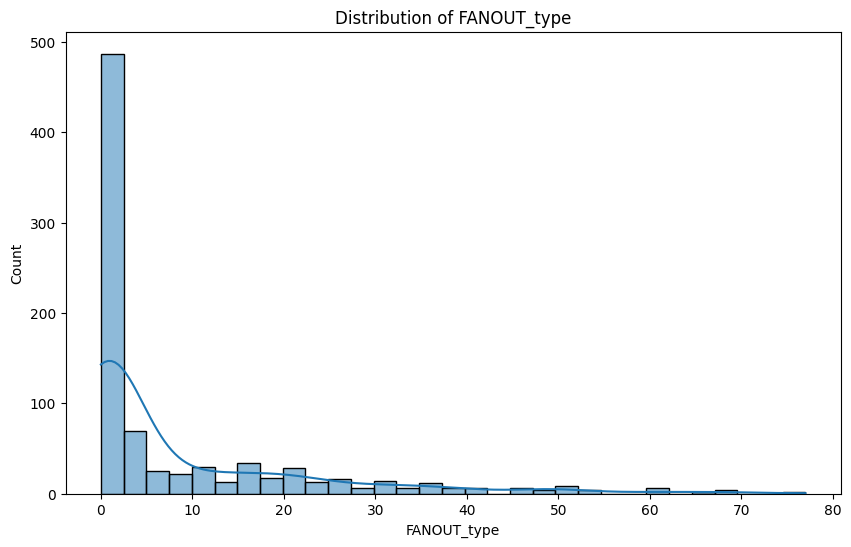

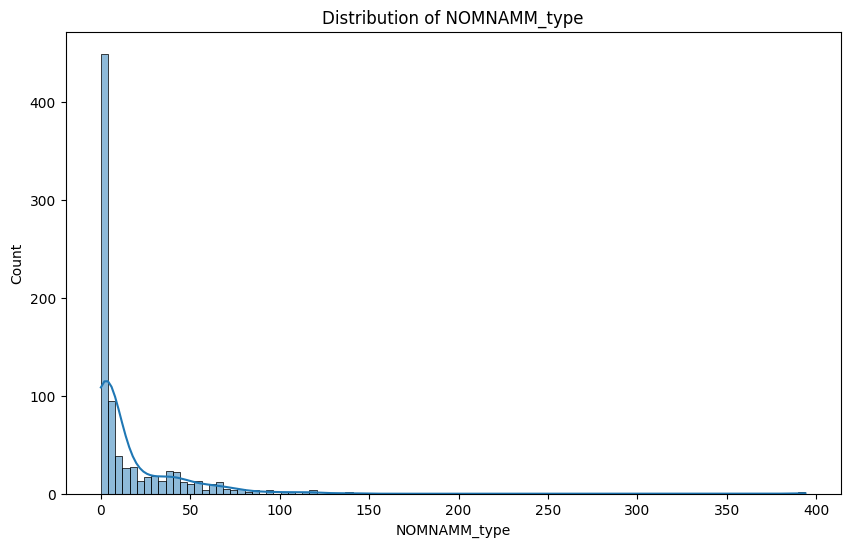

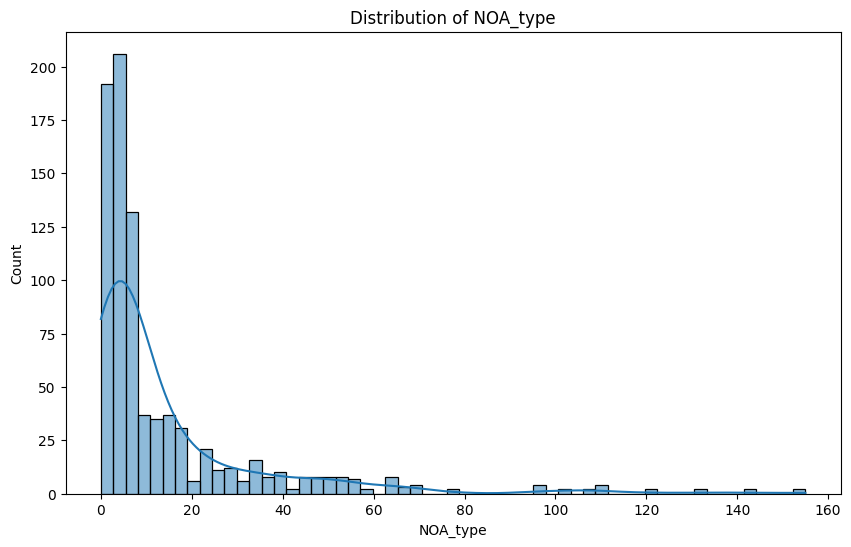

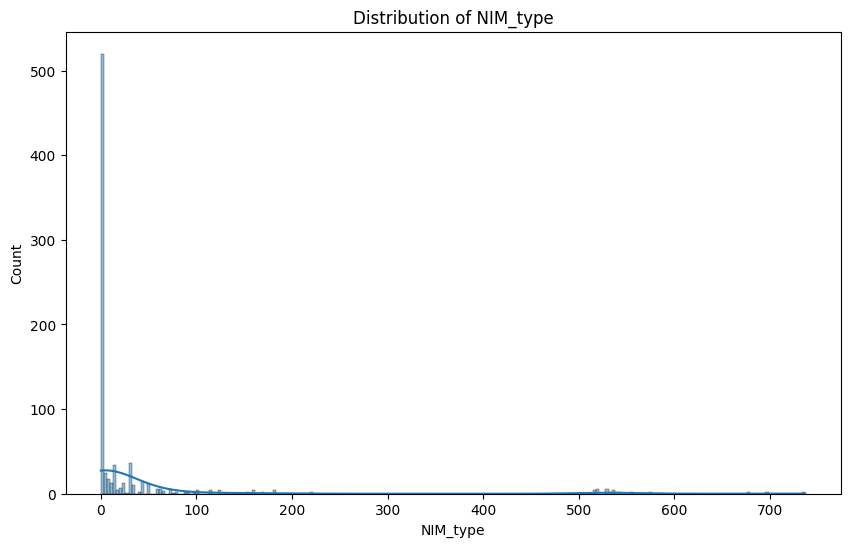

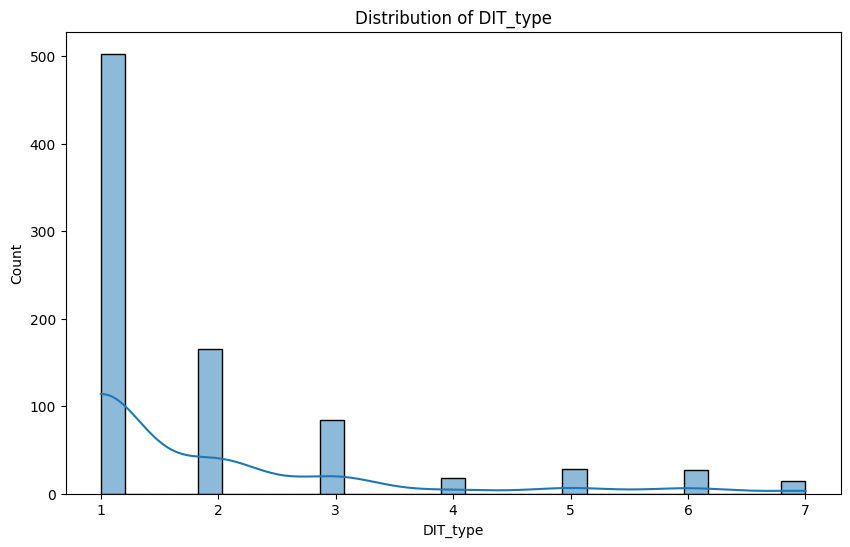

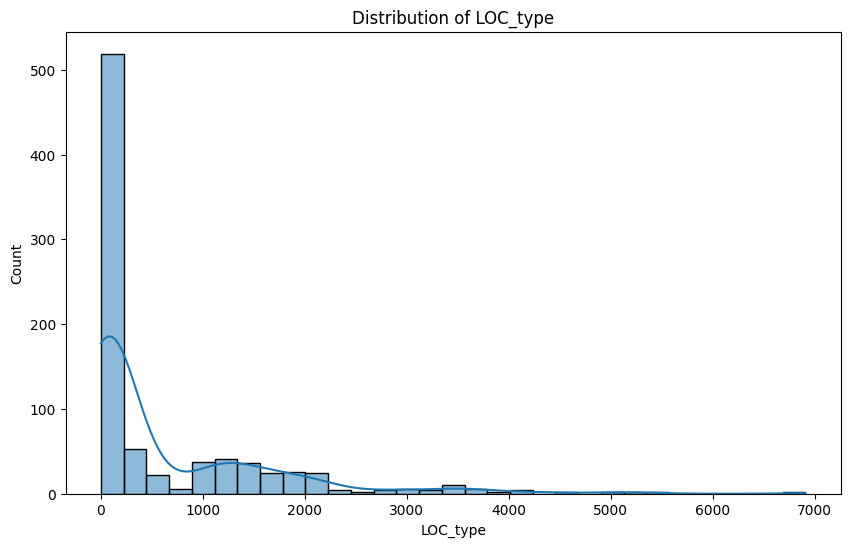

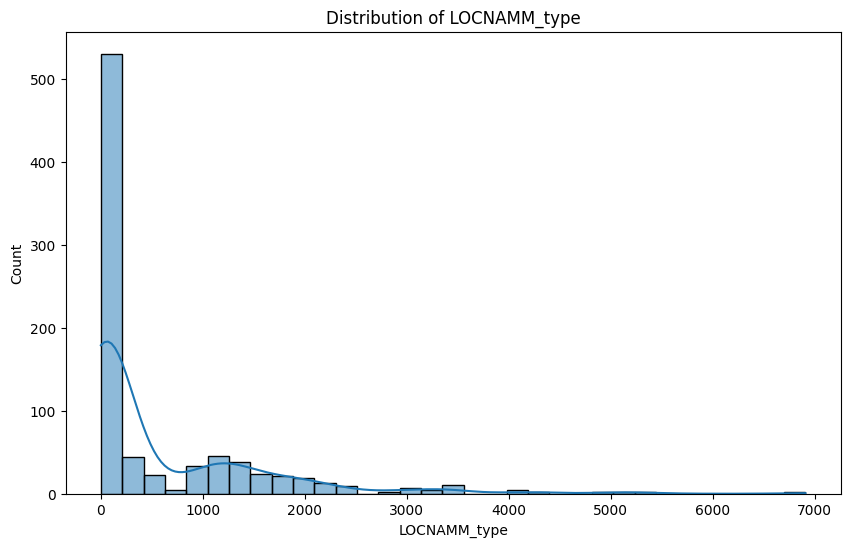

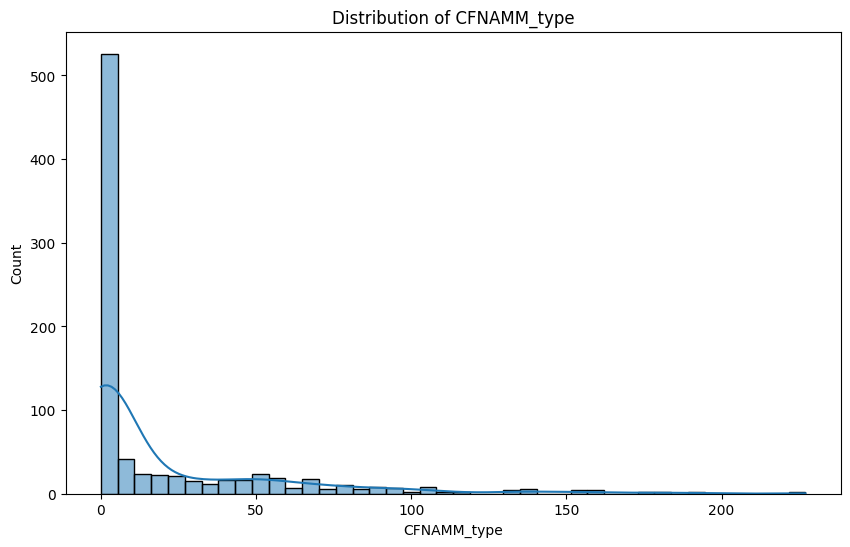

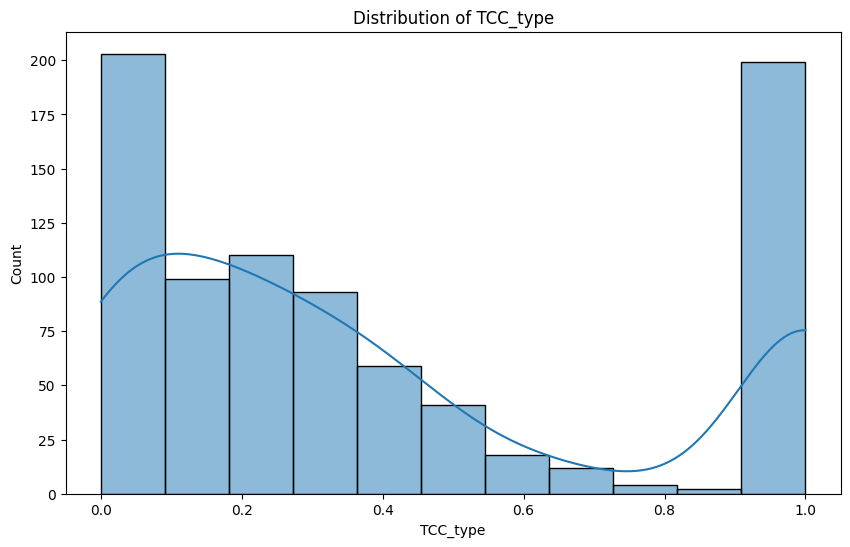

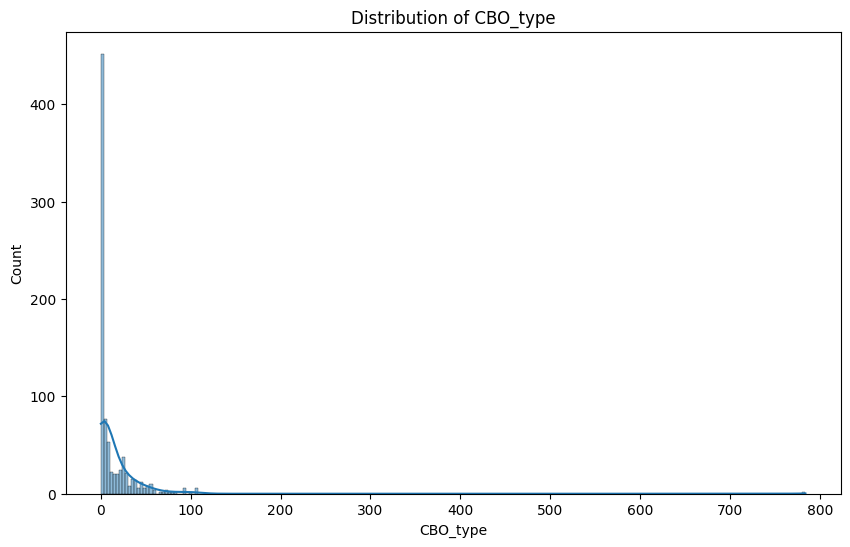

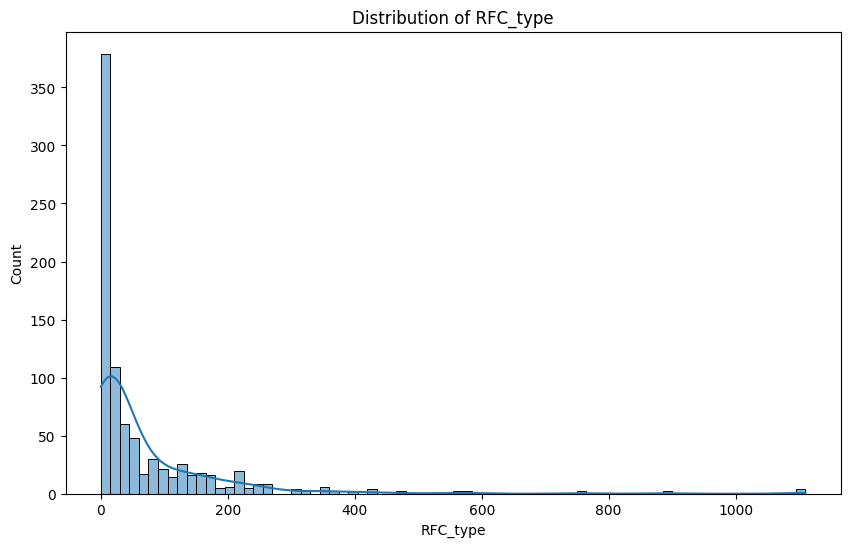

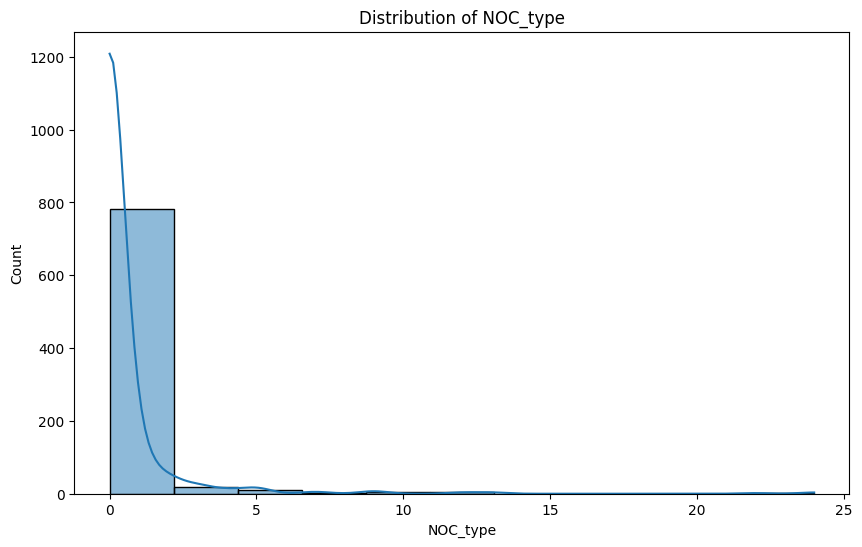

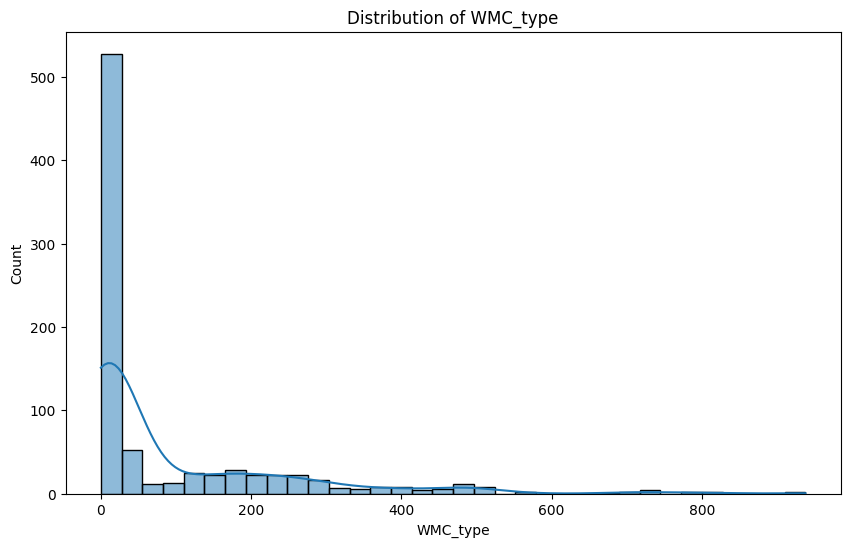

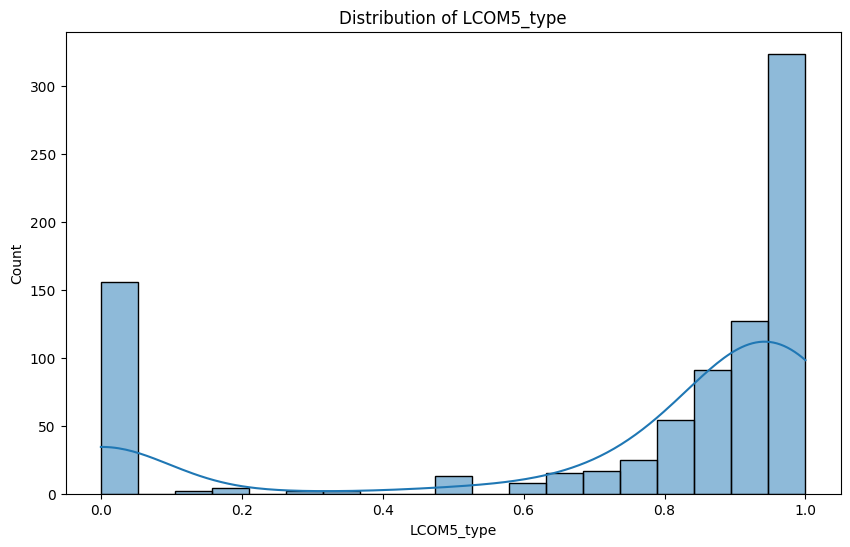

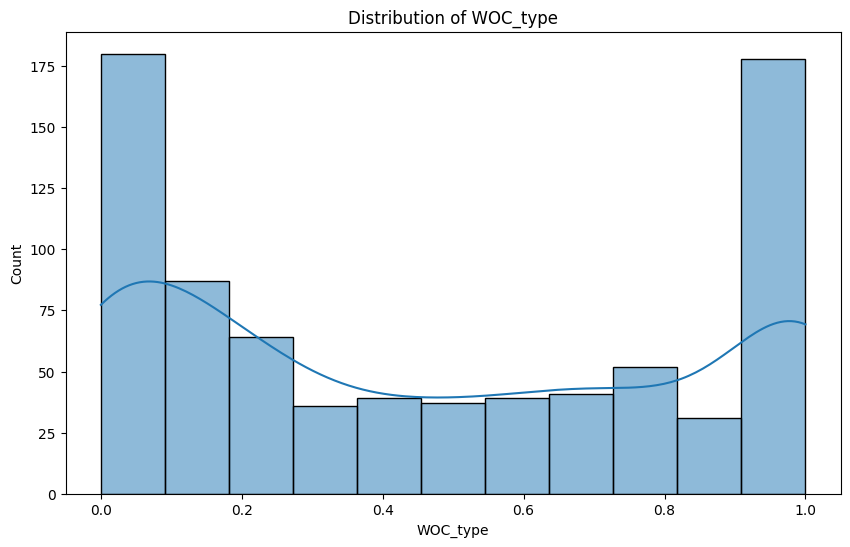

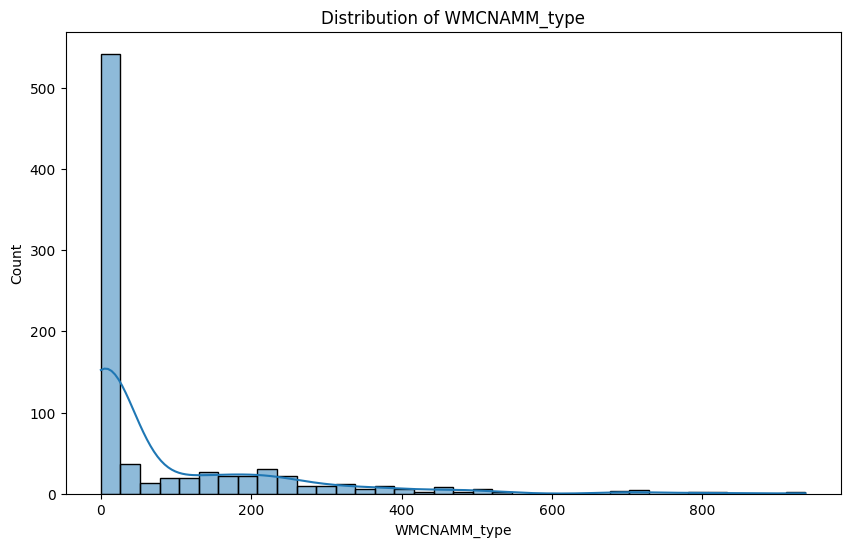

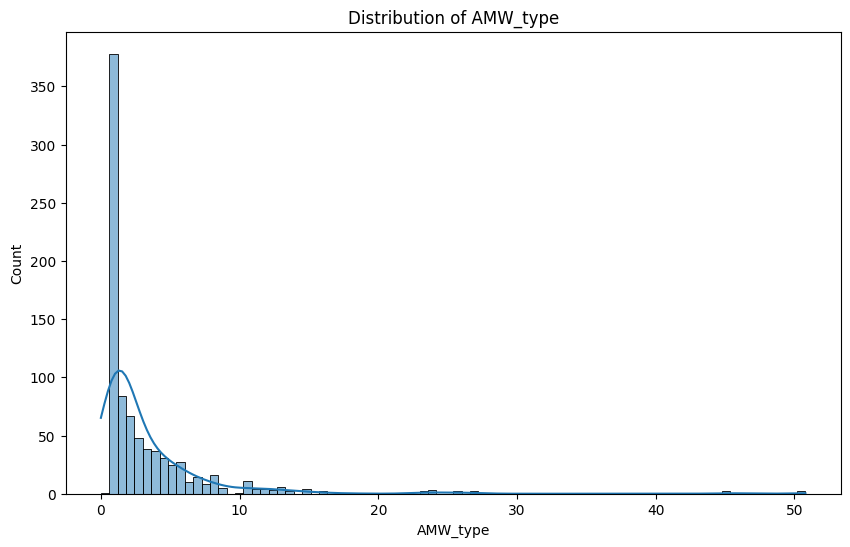

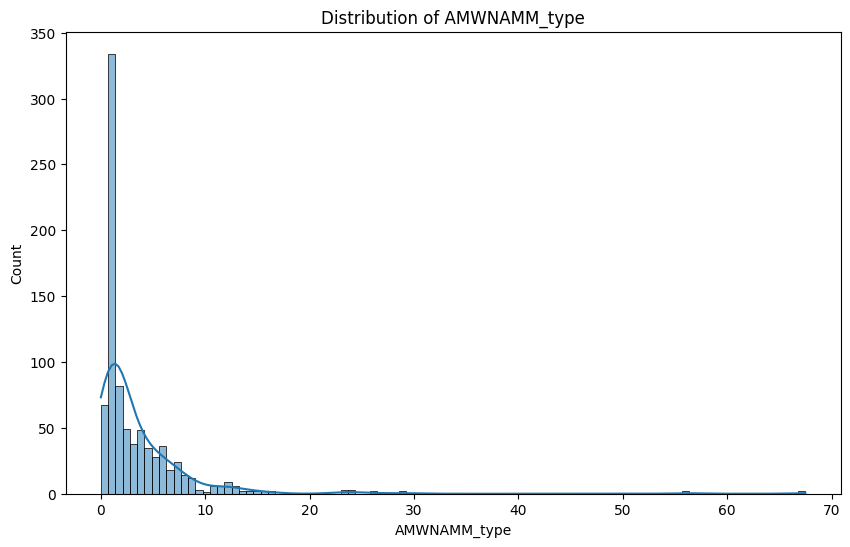

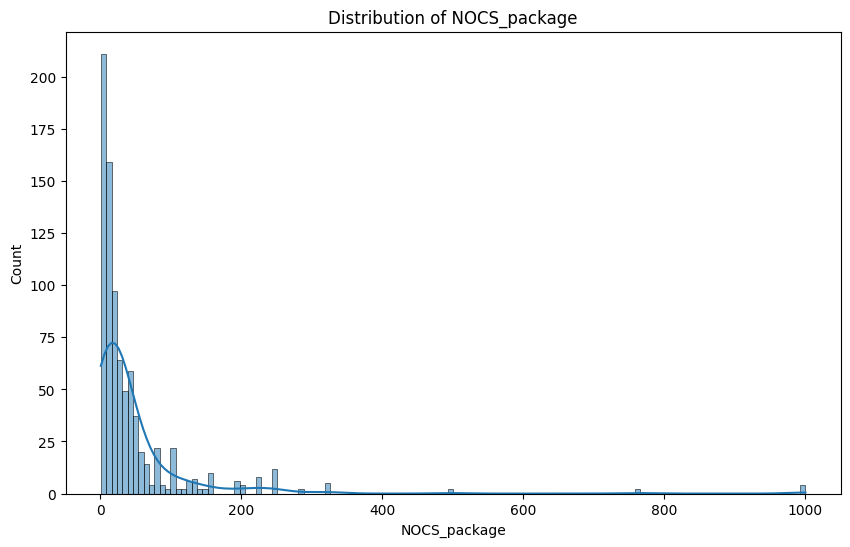

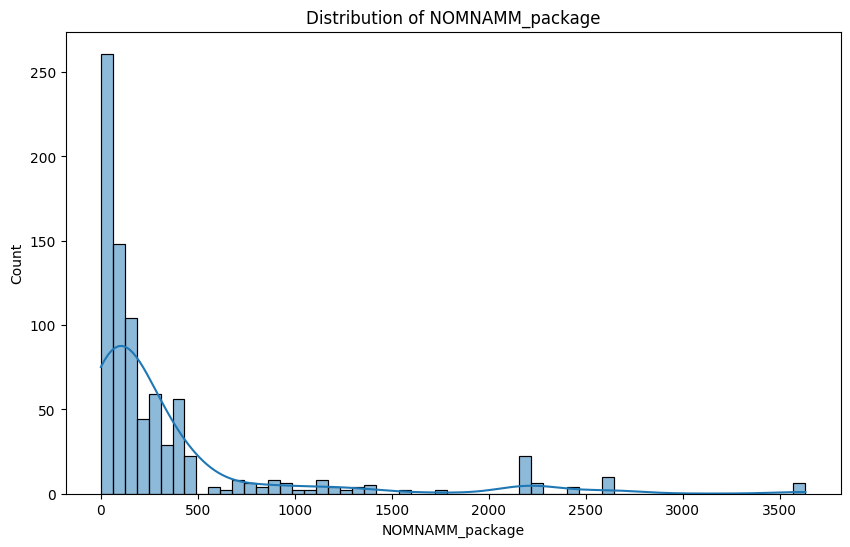

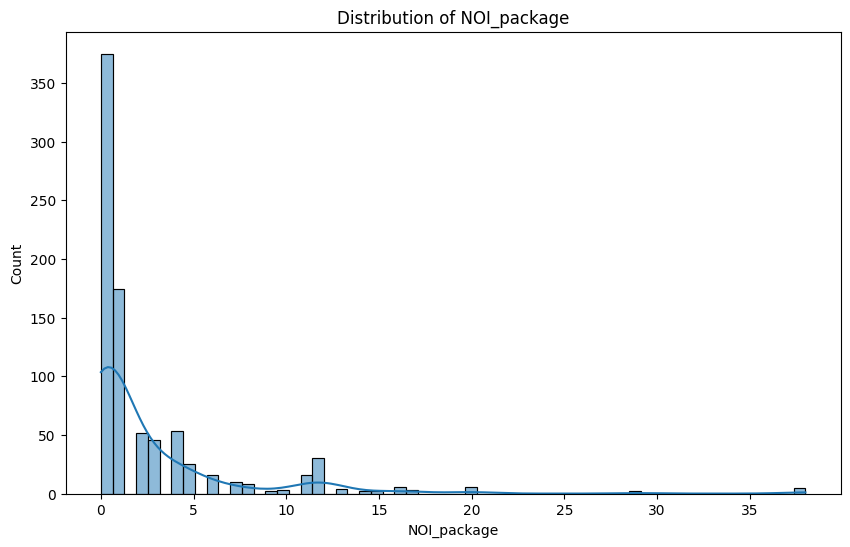

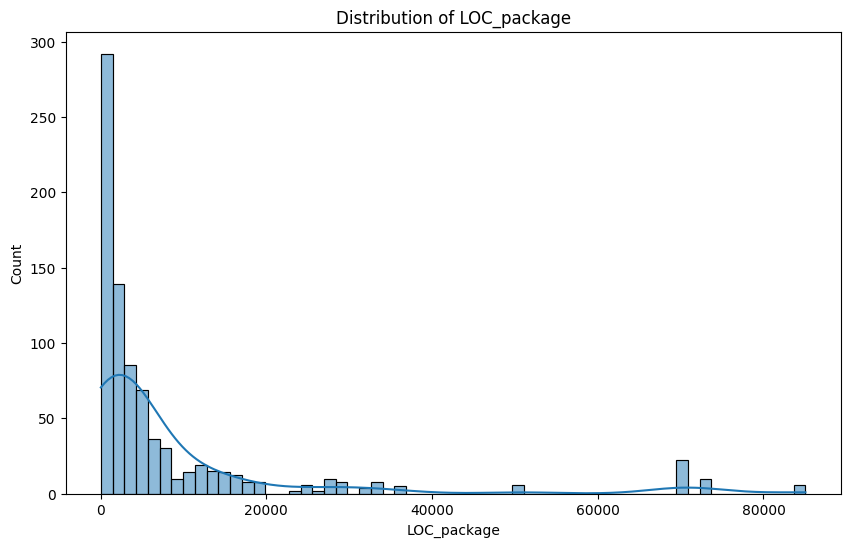

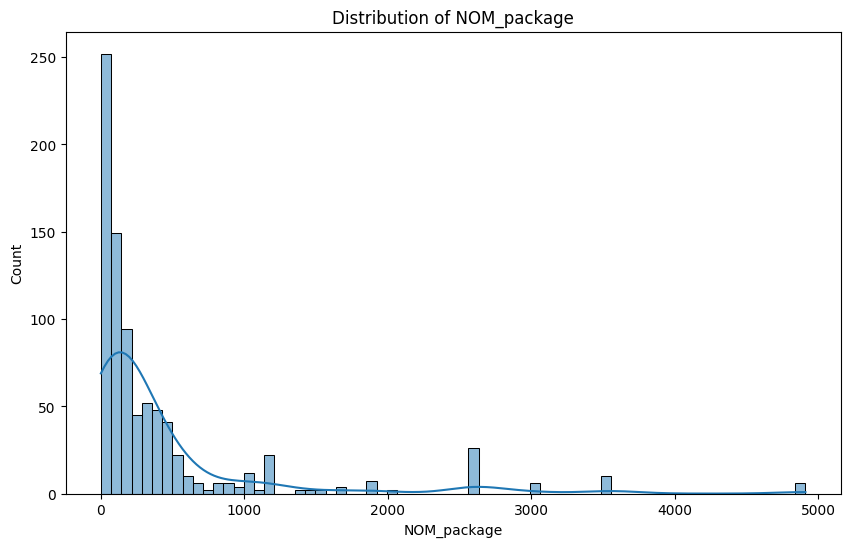

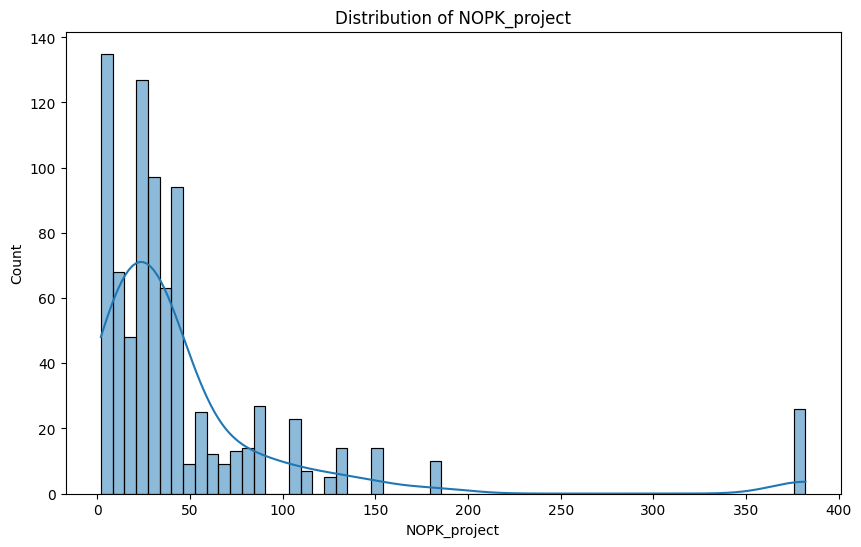

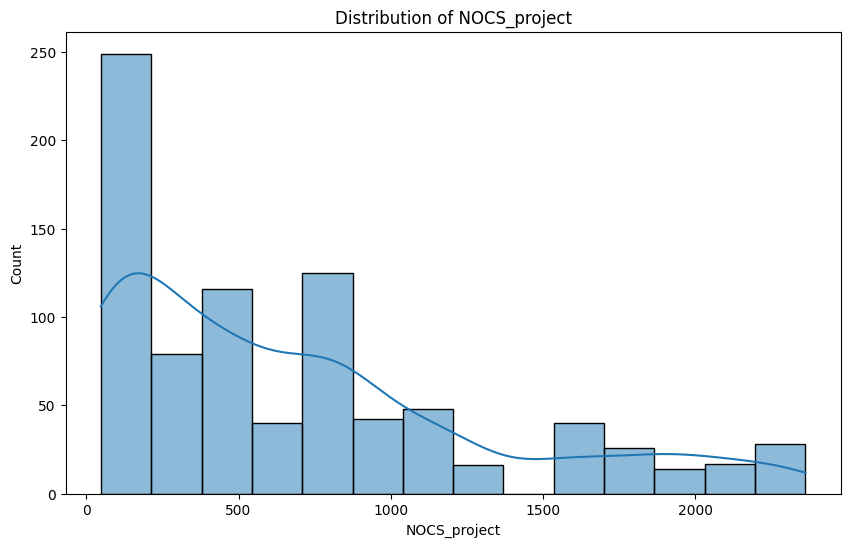

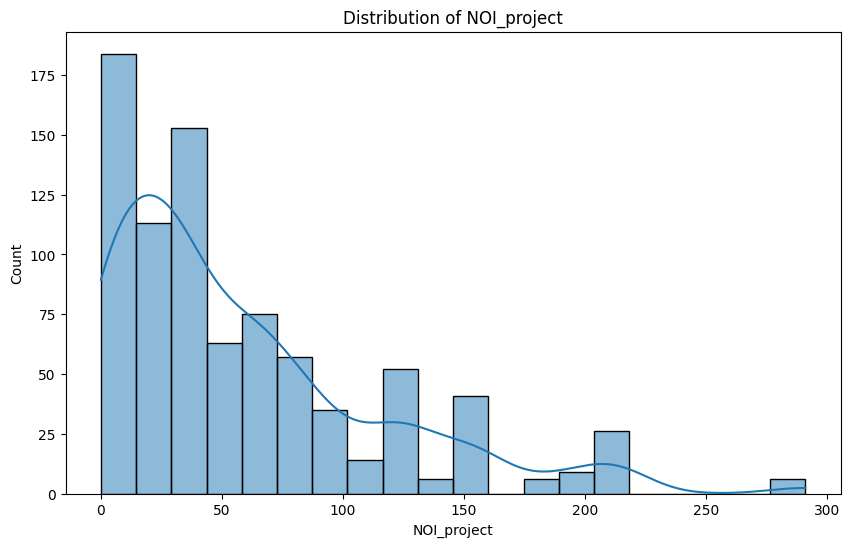

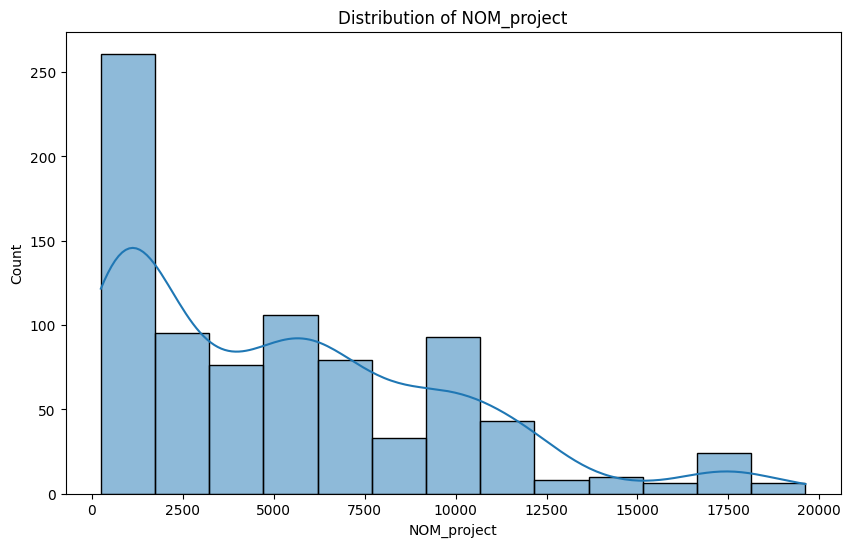

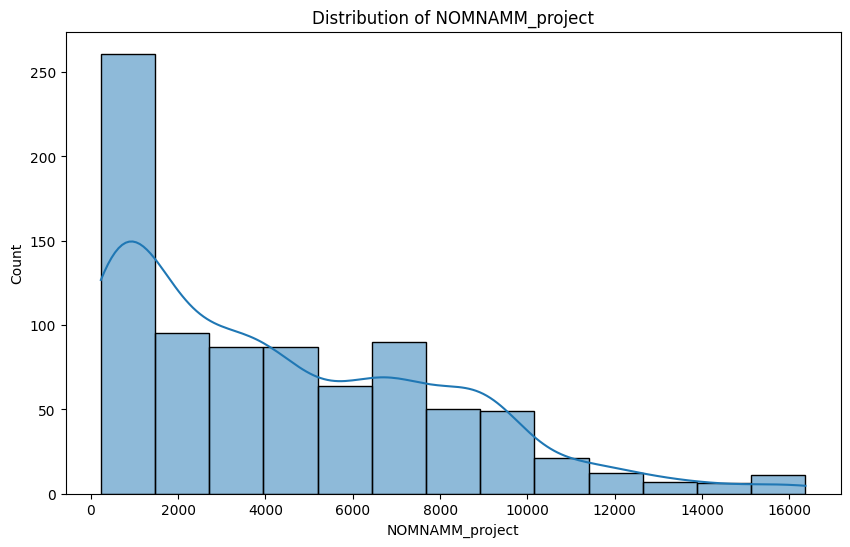

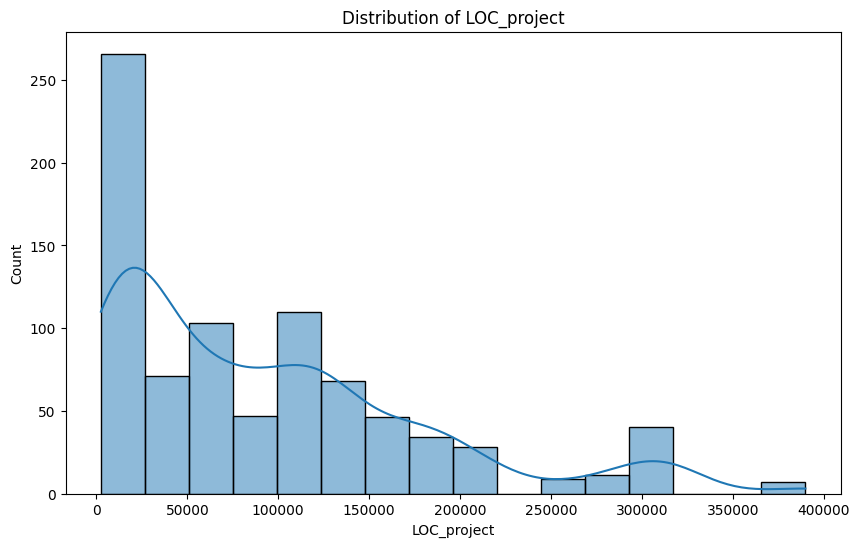

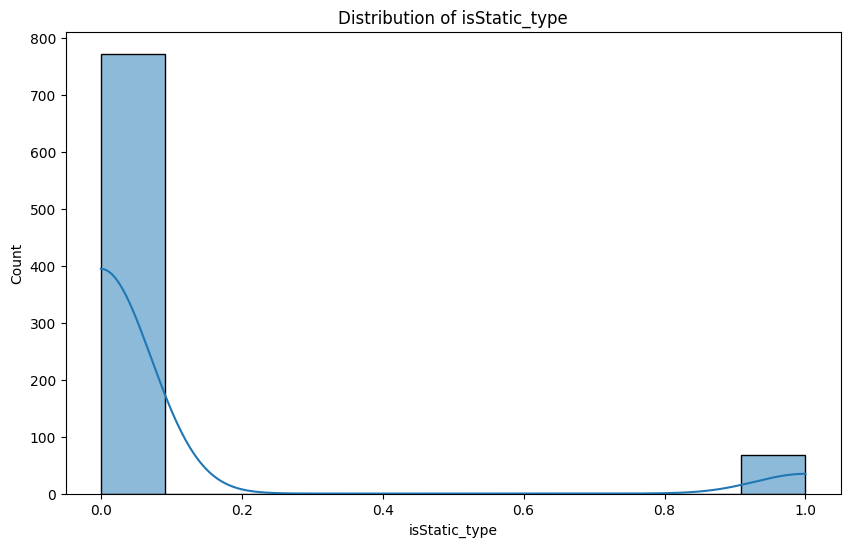

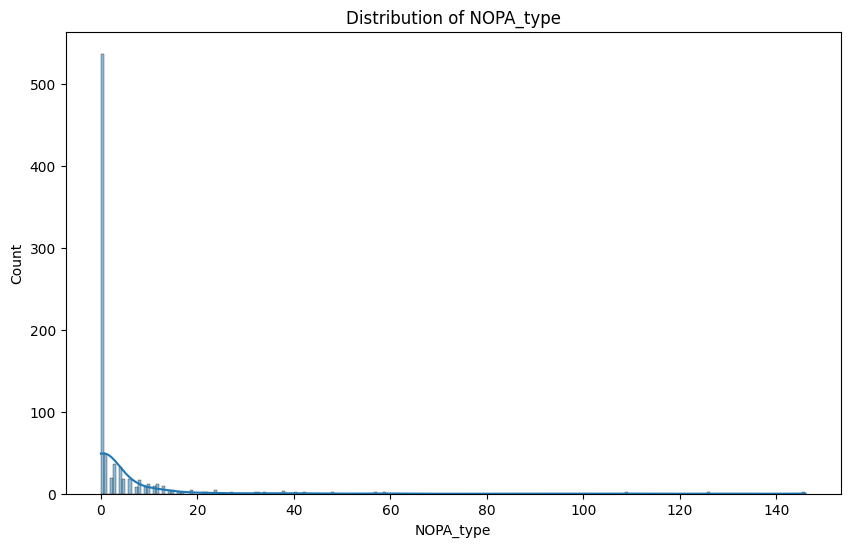

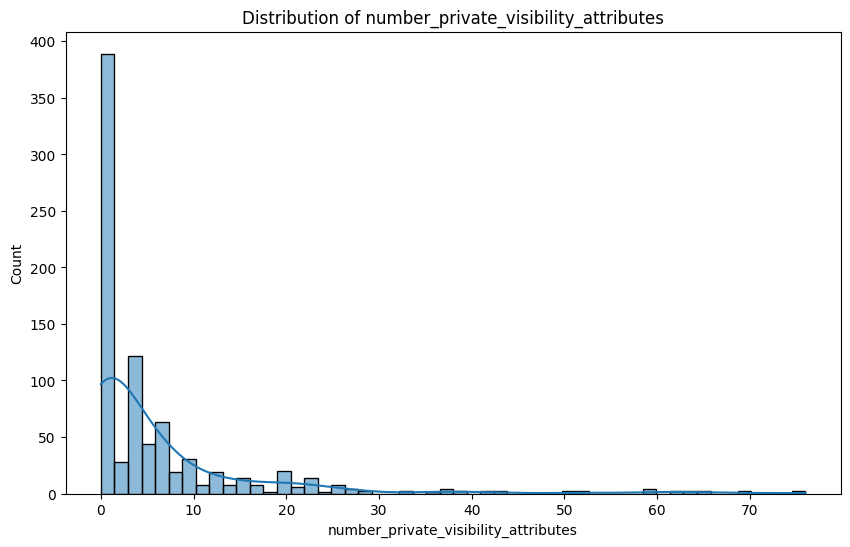

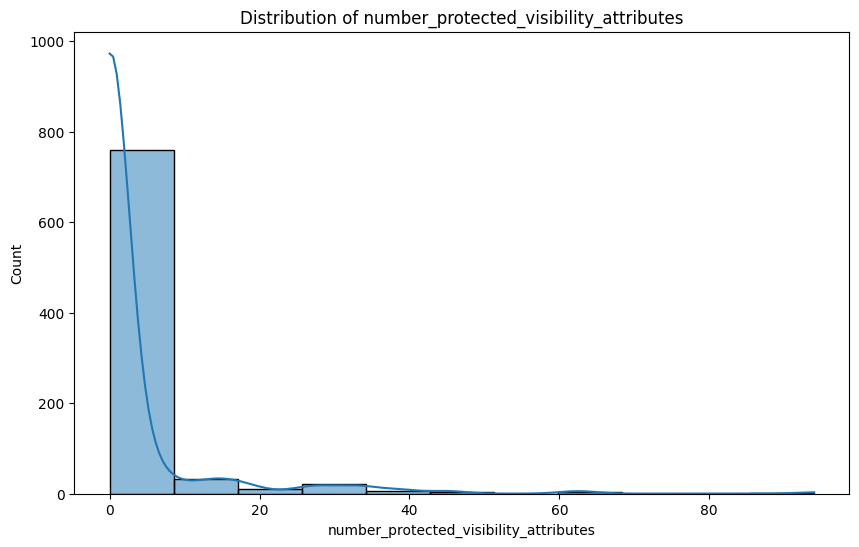

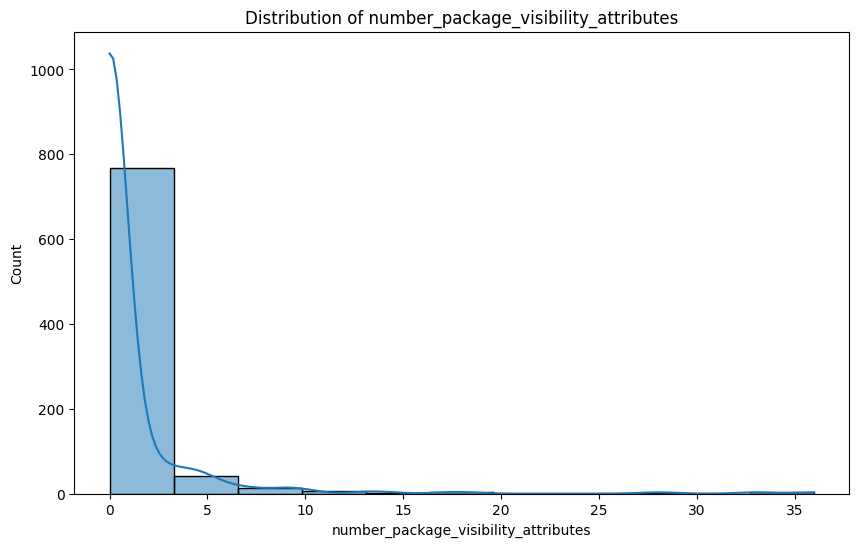

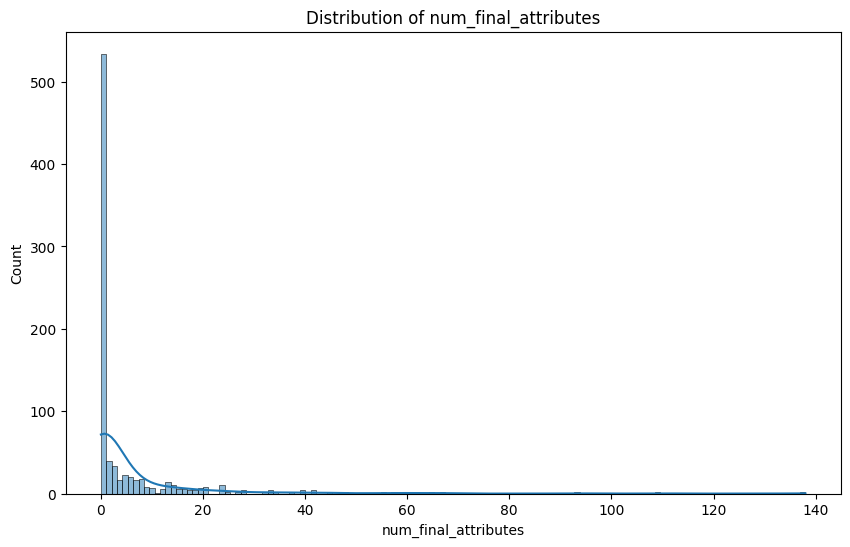

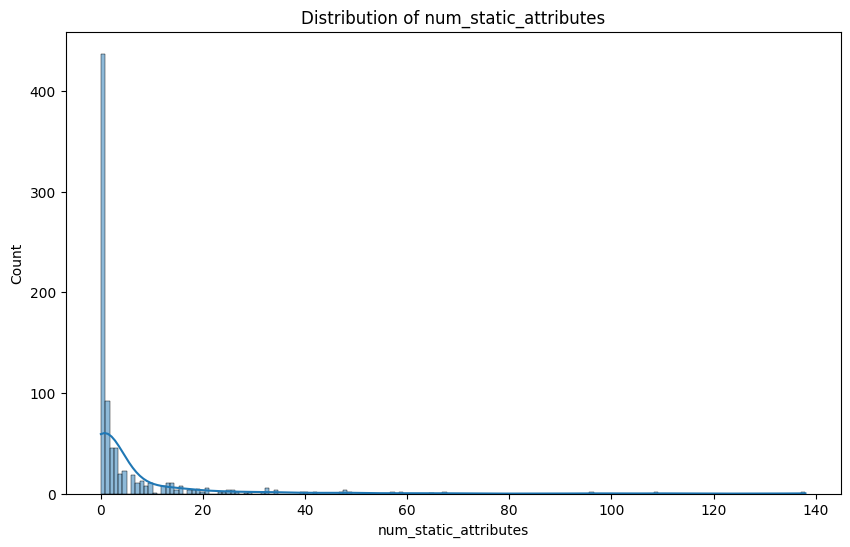

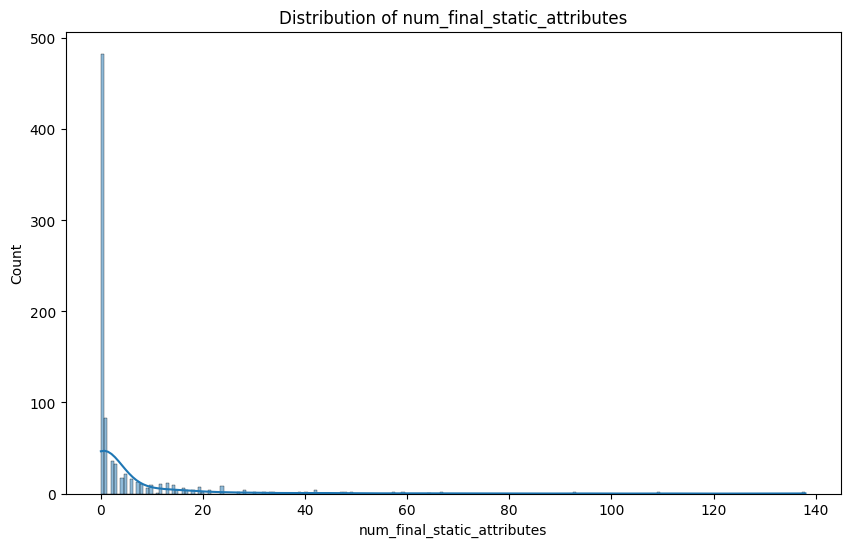

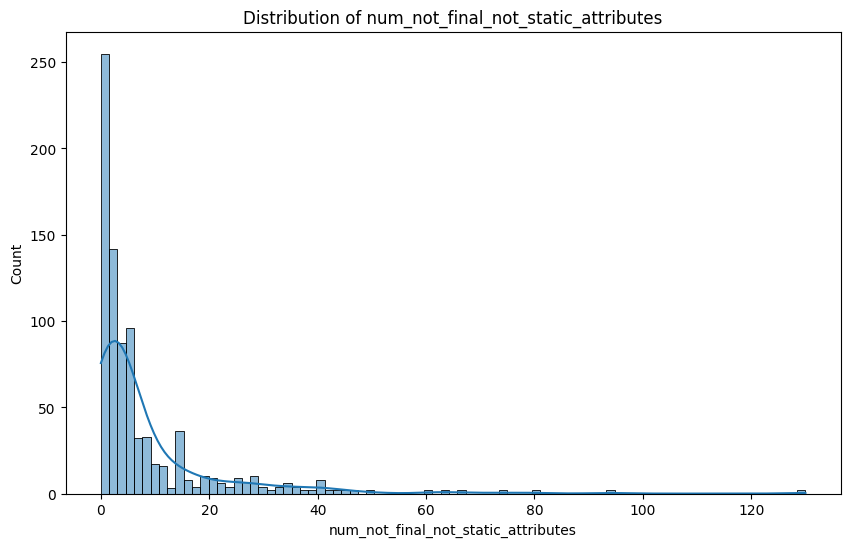

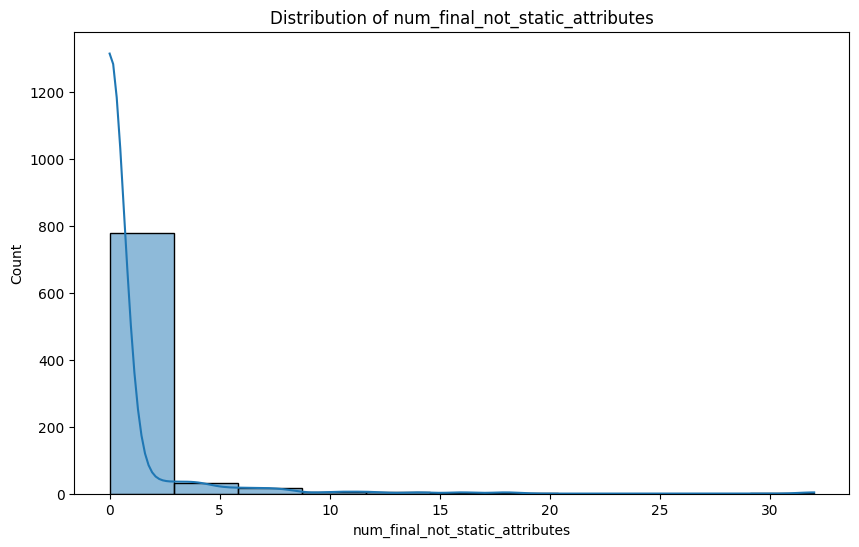

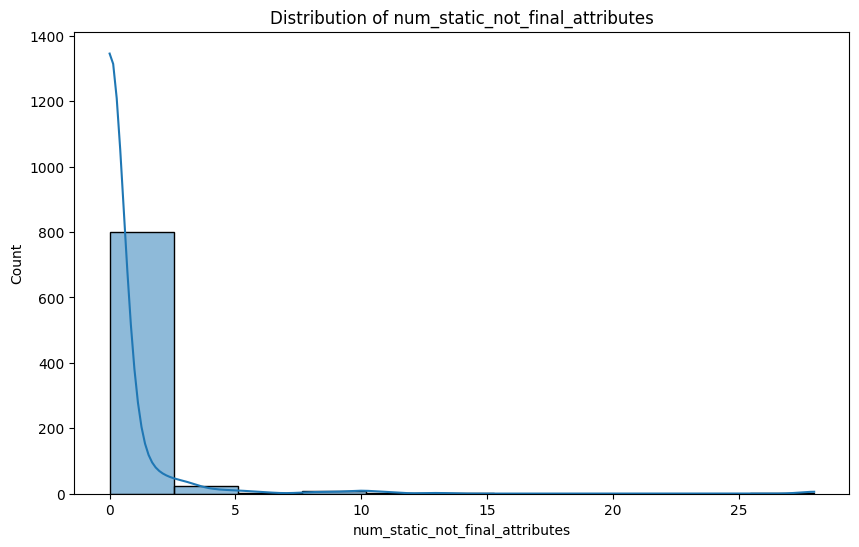

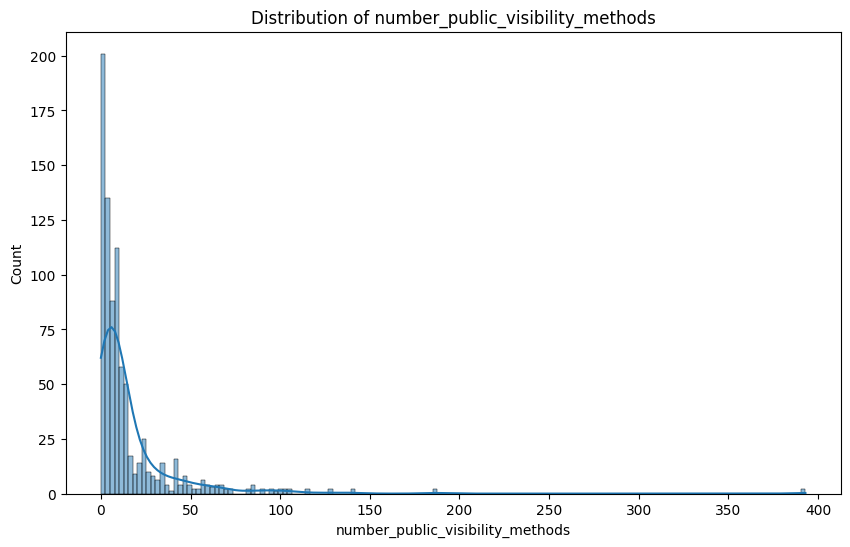

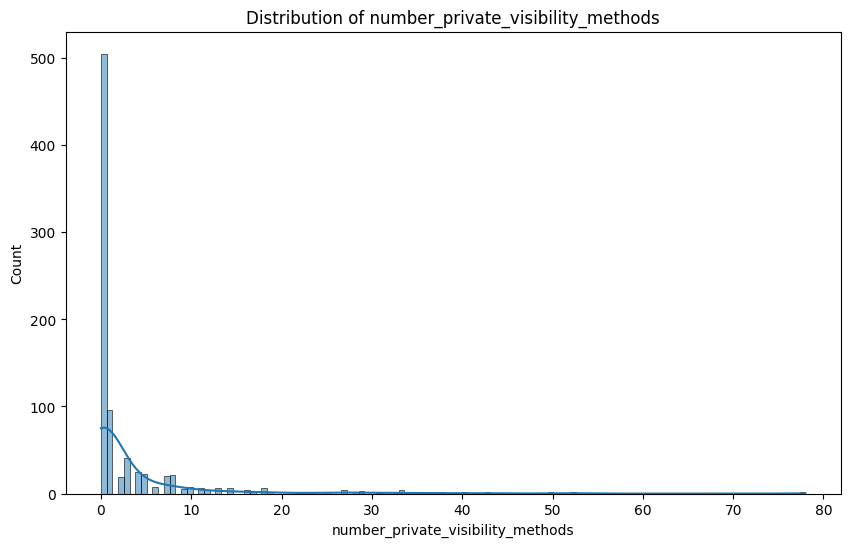

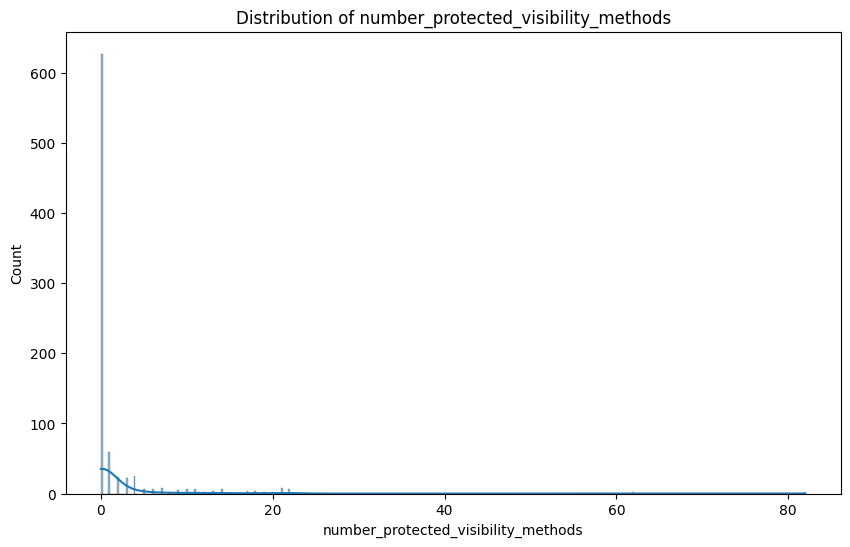

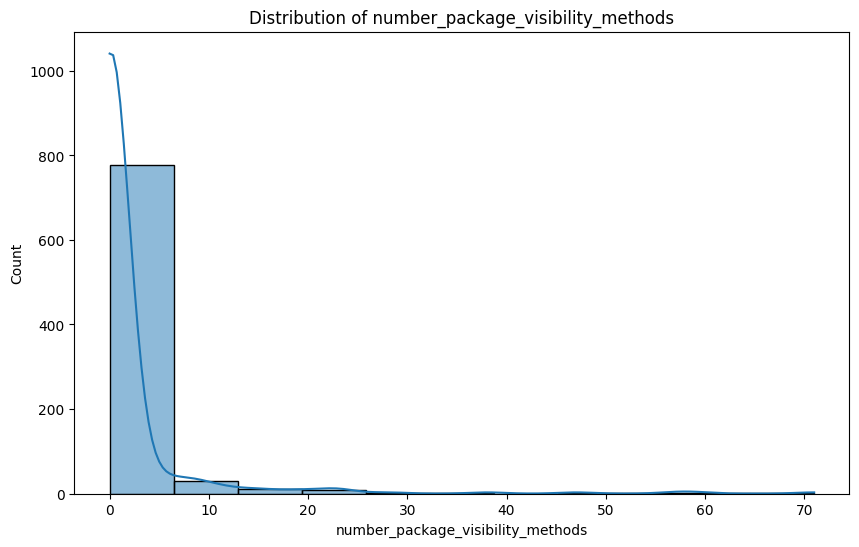

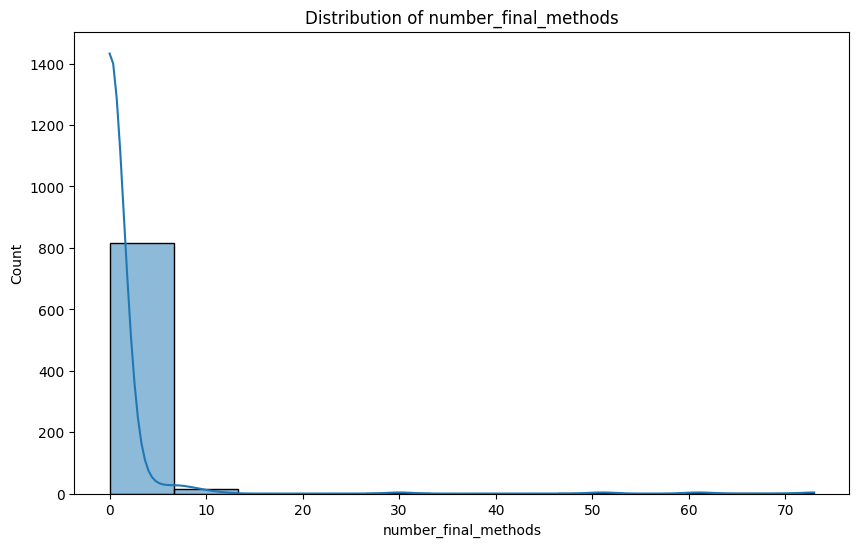

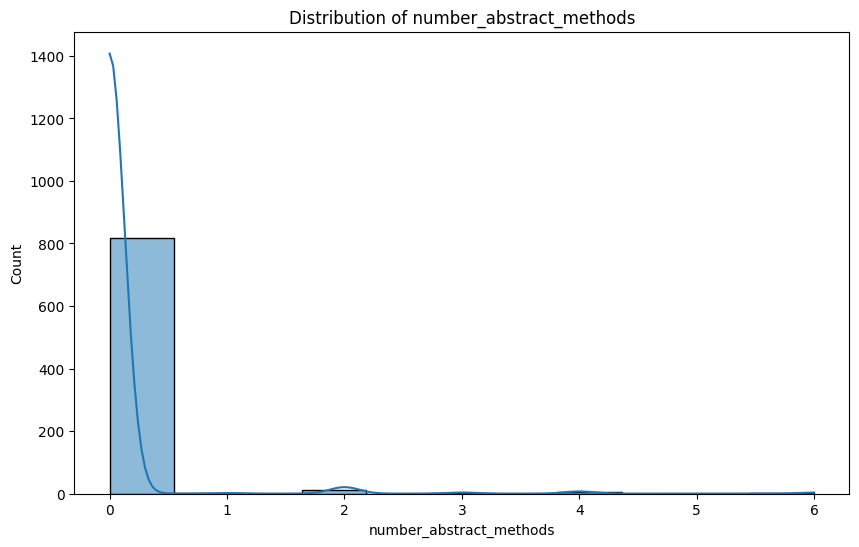

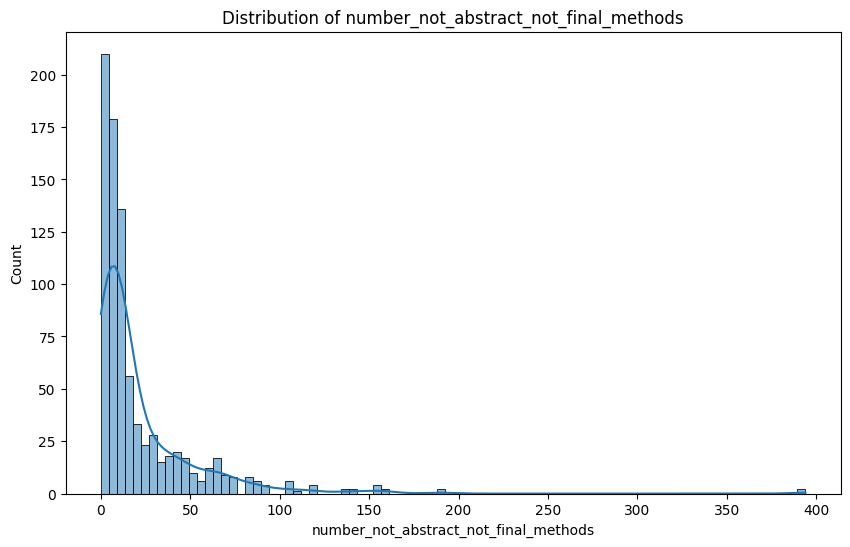

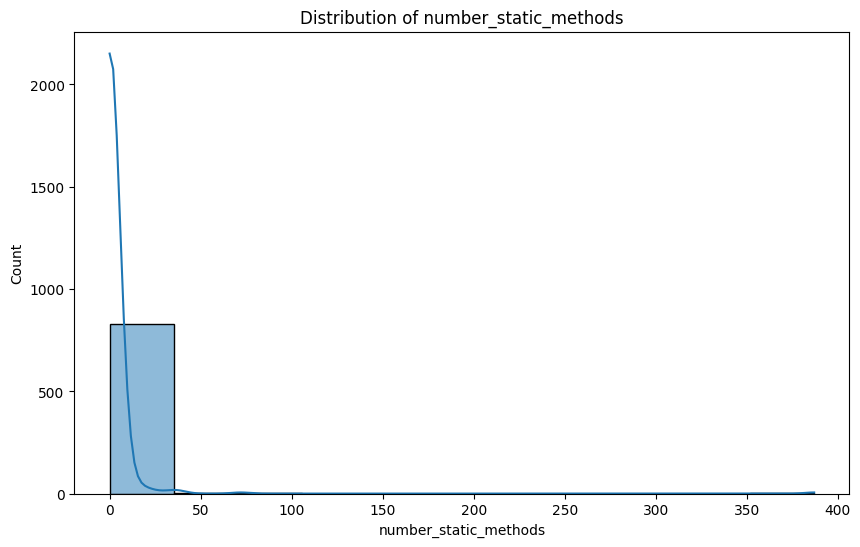

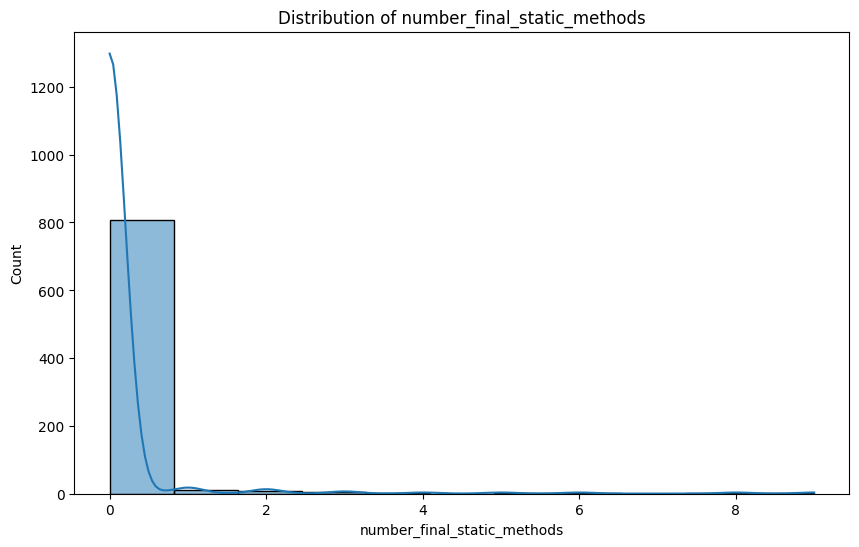

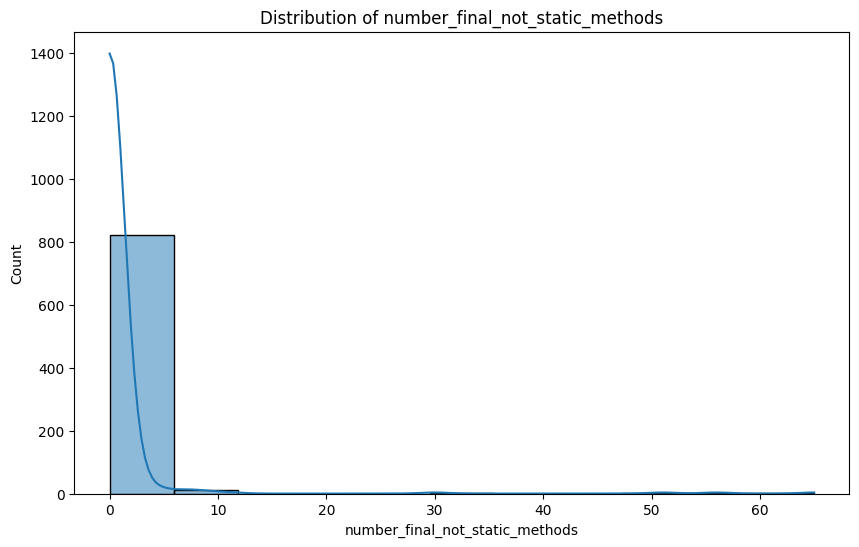

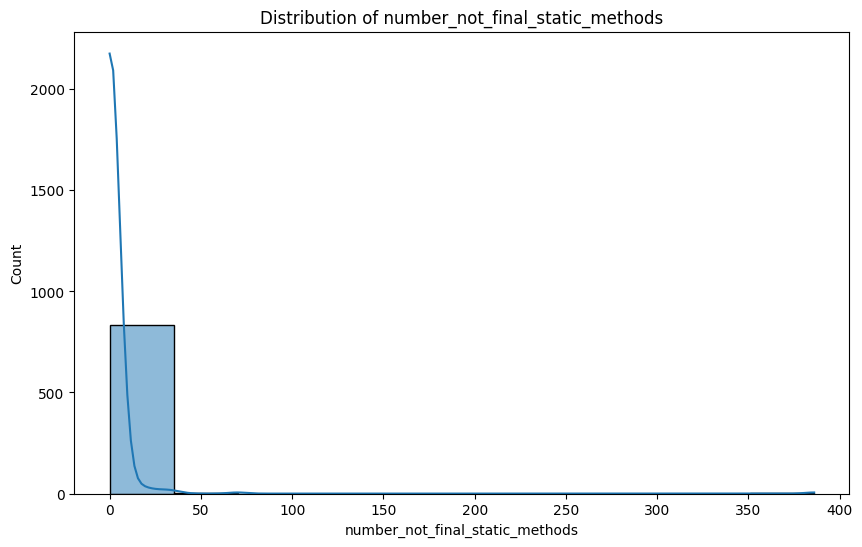

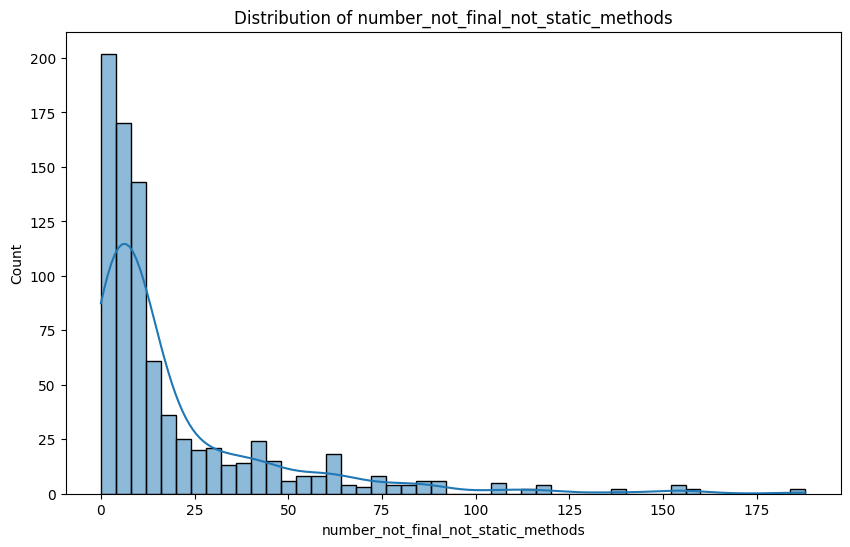

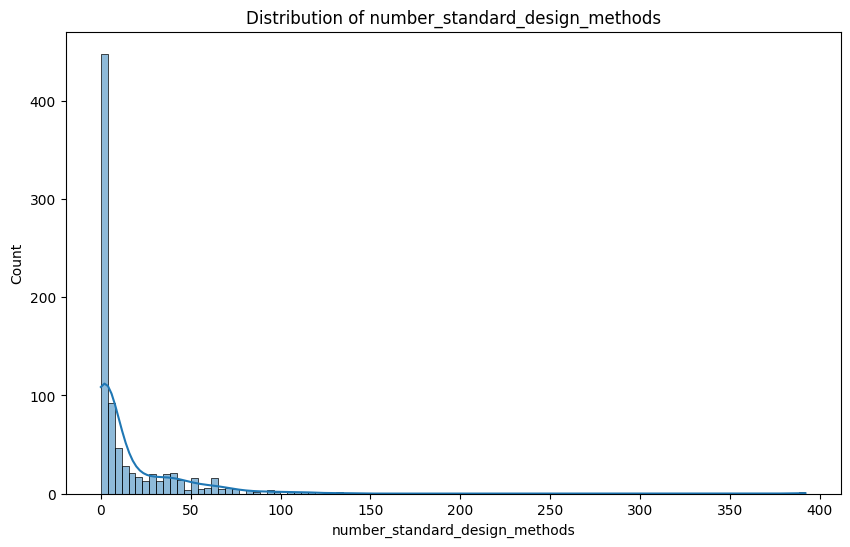

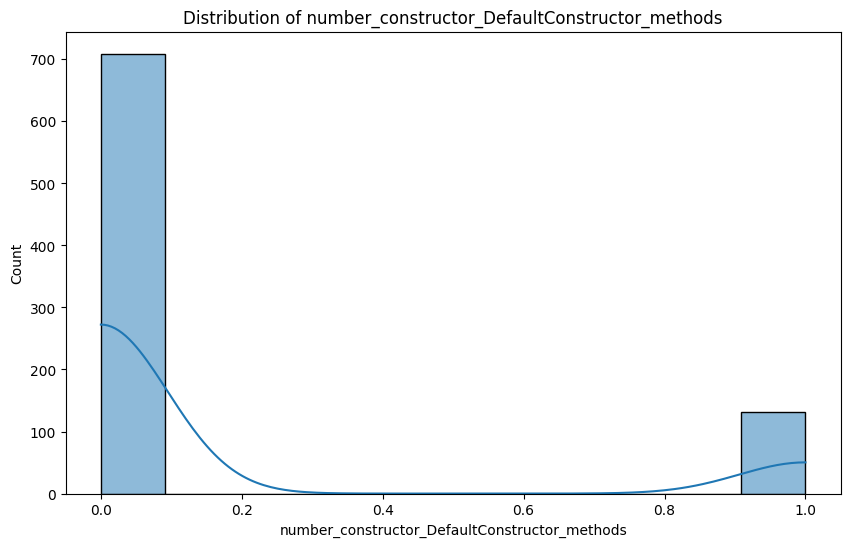

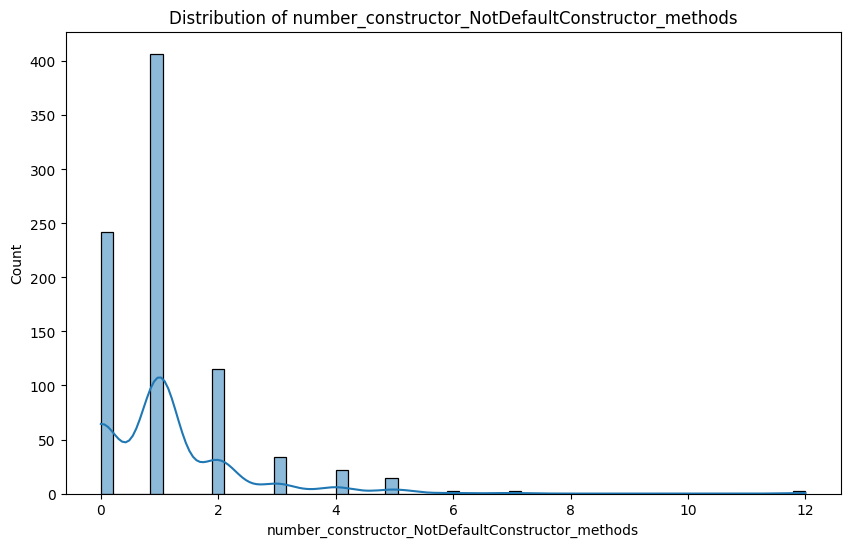


Skewness of numeric features:
 NOII_type                                            4.235463
NOAM_type                                            3.608147
NOCS_type                                            6.184876
NOM_type                                             4.589196
NMO_type                                             6.100011
                                                      ...    
number_not_final_static_methods                     18.468844
number_not_final_not_static_methods                  2.714908
number_standard_design_methods                       5.916663
number_constructor_DefaultConstructor_methods        1.899965
number_constructor_NotDefaultConstructor_methods     2.898645
Length: 61, dtype: float64


In [ ]:
# Analyzing the distribution of all numeric features in the dataset

# Select numeric columns only (int and float types)
numeric_columns = data_class_df.select_dtypes(include=['float64', 'int64']).columns

# Visualize the distribution of each numeric feature
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data_class_df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

# Calculate the skewness of each numeric feature
skewed_features = data_class_df[numeric_columns].skew()
print("\nSkewness of numeric features:\n", skewed_features)


1.大部分特征的分布具有偏态：

几乎所有特征都表现出左偏态（左侧有高峰，右侧有长尾），这意味着大多数样本的特征值集中在较低的区间，而少数样本的特征值非常高。这种偏态分布可能对某些机器学习算法（如线性模型）造成不利影响，因为它们假设数据分布是正态的。
有些特征（如NIM_type、NOA_type）的偏态非常明显，甚至集中在极小的值上，少数样本的值极高。

2.尺度（Scale）差异显著：

不同特征之间的数值范围差异很大。例如，某些特征（如DIT_type和NMO_type）的数值范围较小，而其他特征（如LOC_type和RFC_type）的数值范围很大。
这种尺度差异可能导致模型训练时对某些特征过于敏感，尤其是在没有进行特征标准化的情况下。

3.双峰分布特征：

某些特征（如LCOM5_type和TCC_type）显示出双峰分布的趋势。这意味着数据集中有两个较大的群体（cluster），可能是由于某种特征间的关系造成的。这类分布可能反映出数据集中的某些复杂关系，可以进一步分析。

假设：每个特征的数值越低，表示该代码的复杂度或问题（例如code smell）的可能性越小。换句话说，数值越高的代码越可能包含code smell。

推论：因为在大多数特征的分布中，数值集中在较低的范围（多数代码没有code smell或复杂度较低），这意味着大多数代码片段可能是“健康的”或“没有code smell”的。
作者的发现：作者在研究中提到，只需要100个训练样本就可以达到至少95%的检测准确率。这可能是因为大多数代码片段都没有code smell，因此模型很容易通过学习这些样本来预测哪些代码是“健康的”，从而达到高准确率。

支持这个假设的几点理由：

数据分布的偏态：
你提供的特征分布图表明，大部分代码片段的特征值都很低。这表明大多数代码在这些特征上表现良好，没有明显的问题。
因此，模型在学习过程中很容易通过识别“良好”代码片段的特征来进行高准确率的分类，因为这部分数据占据了绝大多数。

不平衡的类分布：
数据集中存在类别不平衡，false（没有code smell）的数量远多于true（有code smell）。这进一步支持了你的假设：大部分代码片段是“干净的”。
在这种情况下，模型如果默认判断大多数代码没有code smell（false），就可以轻松达到高准确率。

高准确率的局限性：
由于大多数样本是“没有code smell”的，因此即使模型只学习这些样本，仍然能达到高的检测准确率。但这并不意味着模型对“有code smell”的样本具有很好的识别能力。
这可能导致高准确率并不代表模型的真正泛化能力。模型可能在识别“有code smell”的代码时存在困难。